<a href="https://colab.research.google.com/github/nickstone1911/data-analysis-practice/blob/main/CV_and_Grid_Search.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Today's Agenda

1. Today We are Focused on Cross Validation
>- This is the topic of Chapter 5 in Provost and Fawcett
>- Technical Lesson 07 showed how to do Cross Validation in Python
>>- How to create various training, evaluation, and testing datasets
>>- How to use `cross_val_score` to generate a cross validation  
2. Slides: Introduction to `GridSearchCV`
>- In today's activity we will go through how to use GridSearchCV to help us find optimal hyperparameters
>- [`GridSearchCV` Notes Slides](https://docs.google.com/presentation/d/1lFQzApZF2TJxzbr9WnrL8keej8Za3DmhA6a93litwHo/edit?usp=sharing)
3. Check Your Understanding
>- Complete the `Tech Lesson 07: Cross Validation in scikit-learn Check Your Understanding` in class

4. Tech Practice Exercise
>- Find the best estimator using `GridSearchCV`


# Advanced Business Analytics
## Tech Lesson 7: Cross Validation and `GridSearchCV` in `scikit-learn`

In this practice exercise notebook, we will:

1. Demonstrate how to use `scikit-learn` and the `train_test_split` module to split our datasets into training and testing datasets
2. Train a machine learning model on training data and evaluate it's performance on testing data
3. Expand on the idea of training and testing data by using a more rigorous cross validation procedure
4. Practice splitting data into various testing, training, holdout, and cross validation datasets
5. Begin to discuss the idea of model/data leakage which is a problem in building models we will discuss in various lessons
6. Introduce model evauation
>- We will have a deeper discussion of model evaluation in other lessons
7. Perform a grid search to find optimal hyperparameters

---

## Resources
>- Chapter 5 in Provost and Fawcett

>- [Overfitting and Its Avoidance Slides](https://docs.google.com/presentation/d/1b14pJWpSYue7QYTf-sLEH48cuoTEwkxvZINHpwo-lBI/edit?usp=sharing)
>- [Holdout and Cross Validation Slides](https://docs.google.com/presentation/d/1pLlqpehomzpM0SIdNn85Zlo_l_rR_Fl6eLRjPfTwsQg/edit?usp=sharing)
>- [Cross-validation: evaluating estimator performance scikit-learn doc ](https://scikit-learn.org/stable/modules/cross_validation.html)

---


# Section 0
Imports and Data Load

## 0.1:  Importing Initial Libraries




In [ ]:
import pandas as pd
import numpy as np

# Data Understanding

## Breast Cancer Wisconsin (Diagnostic) Dataset

- **General Information:**
  - The Breast Cancer Wisconsin (Diagnostic) dataset is a popular dataset for binary classification tasks, particularly for predicting whether a breast cancer tumor is benign or malignant.
  - It contains measurements from digitized images of fine needle aspirate (FNA) of breast mass. These measurements describe characteristics of cell nuclei present in the image.
  - The dataset is commonly used for machine learning and data mining research due to its relatively small size and the clear distinction between benign and malignant cases.

- **Data Source:**
  - The dataset was obtained from the University of Wisconsin Hospitals, Madison from Dr. William H. Wolberg.
  - Dr. Wolberg donated the dataset for public use in 1995.

- **Features:**
  - The dataset contains 30 features that are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass.
  - These features describe various characteristics of cell nuclei present in the image, including radius, texture, perimeter, area, smoothness, compactness, concavity, concave points, symmetry, and fractal dimension.
  - Each feature is computed for each cell nucleus present in the image, resulting in multiple measurements per image.

- **Target Variable:**
  - The target variable in the dataset is the diagnosis of the breast mass, which can be either 'benign' or 'malignant'.
  - This binary classification task aims to predict whether a breast mass is benign (non-cancerous) or malignant (cancerous) based on the features computed from the FNA image.

- **Dataset Size:**
  - The dataset contains a total of 569 instances, with 212 malignant cases and 357 benign cases.
  - Each instance corresponds to a different breast mass for which features have been computed.

- **Data Availability:**
  - The Breast Cancer Wisconsin (Diagnostic) dataset is available in the `sklearn.datasets` module in Scikit-learn and can be easily loaded for use in machine learning projects.




---

 ## 0.2: Load the `breast_cancer` Dataset
>- For this exercise we are going to load the Breast Cancer  from `sklearn.datasets`


In [ ]:
from sklearn import datasets

In [ ]:
bc = datasets.load_breast_cancer(as_frame=True)

bc_df = bc.frame

bc_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


# Section 2: Data Understanding and Data Preparation

For this exercise, we are going to focus on learning the code to conduct cross validation and a grid search to find optimal hyperparmeters. In the class exercise, we will not go into depth on data understanding and preparation during this exercise but don't forget this is a critical step and you should conduct your own exploration based on our prior examples to help understand and prepare the data.

---

Conduct your own data understanding exercises and data preparation on your own in this section.

In [ ]:
bc_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [ ]:
bc_df['target'].value_counts()

1    357
0    212
Name: target, dtype: int64

Pairplot on a few features and the target. Pairplot will not work or look right if you try to plot all the features so just try sampling a few.

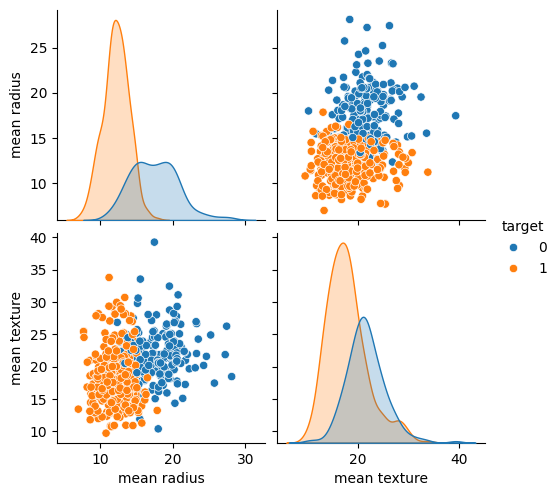

In [ ]:
import seaborn as sns

sns.pairplot(bc_df[['target','mean radius',	'mean texture']], hue="target")

# Section 3: Modeling

The focus on this exercise is on data modeling and evaluation. But keep in mind most models benefit from a rigorous data understanding and data preparation process.

---

## Recall: Train/Test Split Procedure

The following outlines the steps involved in splitting a dataset into training and testing data. Some steps, such as step 0., are there to remind us of the data prep that must be done prior to fitting models. We will skip this step in some tutorials because data prep will be covered in depth in other lessons.

0. Clean and adjust data as necessary for X and y
1. Import Libraries
2. Split Data in Train/Test for both X and y
3. Fit/Train Scaler on Training X Data
4. Scale X Test Data
5. Create Model
6. Fit/Train Model on X Train Data
7. Evaluate Model on X Test Data (by creating predictions and comparing to Y_test)
8. Adjust Parameters as Necessary and repeat steps 5 and 6

---

## 3.1: Imports

In the next cell load the necessary libraries from `scikit-learn` to load:

>-  `train_test_split`
>- `cross_val_score`
>- `GridSearchCV`
>- Support Vector Machine classifer: `SVC`


In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.svm import SVC

## 3.2: Define Features and Target Variables

In the next cell, define your `X` and `y` variables.

>- Show the last 5 records in the `y` variable in your output.

In [ ]:
X = bc_df.drop('target', axis=1)
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
y = bc_df['target']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

## 3.3: Split Dataset

In the next cell, split the dataset into traning and test sets.

>- Use a 20% test size
>- Set a random state of 42

Show the number of records in your training and test sets in your outut.



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= .2, random_state = 42)

X_test.shape, y_test.shape

((114, 30), (114,))

## 3.4: Fit/Train Scaler

In the next cell, fit and scale the training data using the `StandardScaler()`.
>- Name the scaled data: `X_train_scaled`

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_train_scaled[:5]

array([[-1.44075296, -0.43531947, -1.36208497, -1.1391179 ,  0.78057331,
         0.71892128,  2.82313451, -0.11914956,  1.09266219,  2.45817261,
        -0.26380039, -0.01605246, -0.47041357, -0.47476088,  0.83836493,
         3.25102691,  8.43893667,  3.39198733,  2.62116574,  2.06120787,
        -1.23286131, -0.47630949, -1.24792009, -0.97396758,  0.72289445,
         1.18673232,  4.67282796,  0.9320124 ,  2.09724217,  1.88645014],
       [ 1.97409619,  1.73302577,  2.09167167,  1.85197292,  1.319843  ,
         3.42627493,  2.01311199,  2.66503199,  2.1270036 ,  1.55839569,
         0.80531919, -0.81268678,  0.75195659,  0.87716951, -0.89605315,
         1.18122247,  0.18362761,  0.60059598, -0.31771686,  0.52963649,
         2.17331385,  1.3112795 ,  2.08161691,  2.1374055 ,  0.76192793,
         3.26560084,  1.92862053,  2.6989469 ,  1.89116053,  2.49783848],
       [-1.39998202, -1.24962228, -1.34520926, -1.10978518, -1.33264483,
        -0.30735463, -0.36555756, -0.69650228,  1

## 3.5: Scale Test Data

In the next cell, scale the testing data using the `StandardScaler()`.
>- Name the scaled test data: `X_test_scaled`

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_test_scaled = scaler.fit_transform(X_test)

X_test_scaled[:5]

array([[-0.4877952 , -0.25088379, -0.46378664, -0.51543986,  0.05784012,
        -0.0262922 , -0.10351188, -0.31929301,  0.40877389,  0.11968017,
        -0.0858903 , -0.39144008, -0.22090758, -0.2944085 , -0.10670318,
        -0.38822597, -0.05805714, -0.18386347, -0.30097441, -0.05389032,
        -0.29186744, -0.2492245 , -0.34337233, -0.37693497,  0.32080655,
        -0.13570975,  0.0219982 , -0.21989091,  0.23083947,  0.17173277],
       [ 1.37325734,  0.36318719,  1.29254295,  1.39312002, -0.60829613,
        -0.07993782,  0.24277219,  0.67513869, -0.85597344, -1.29896166,
         1.47064932, -0.81206704,  1.4289415 ,  1.44852743, -1.01379125,
        -0.56339254, -0.27204702,  0.40725139, -0.75978406, -1.00547962,
         1.71934692,  0.05256312,  1.68197529,  1.68648542, -0.7636134 ,
        -0.16099207,  0.02979422,  0.93019499, -0.58958803, -0.972629  ],
       [ 0.37225845, -0.05148067,  0.38772954,  0.27083616,  0.72327957,
         0.2789329 ,  0.7210035 ,  0.70788511,  0

## 3.6: Create Model

In the next cell, create an initial Support Vector Machine classifier with the following parameters:

>- C = 0.1, kernel = 'rbf', gamma = 1, class_weight = "balanced"
>- Name this first model, `model_1`

In [ ]:
model_1 = SVC(kernel='rbf', gamma = 1, class_weight = 'balanced', C = 0.1)

## 3.7: Evaluate `model_1`

In the next cell, evaluate the first model using `cross_val_score` with the following parameters:

>- Use 10 folds in your cross validation
>- Store the cross validation scores in a variable named, `cv_scores`


Show the values of `cv_scores` in your output.

In [ ]:
cv_scores= cross_val_score(model_1, X_train_scaled, y_train, cv=10)

cv_scores

array([0.36956522, 0.36956522, 0.36956522, 0.36956522, 0.36956522,
       0.64444444, 0.62222222, 0.62222222, 0.62222222, 0.62222222])

Show the mean and standard devation from  `cv_scores`.

>- Round these to two decimals

In [ ]:
round(cv_scores.mean(),2), round(cv_scores.std(),2)

(0.5, 0.13)

## 3.7: Evaluate `model_1` on Test Data

Now let's see how `model_1` performs on the test data.

In the next cell, evaluate `model_1` on the test data.
>- Don't forget to fit your model on the training data prior to calling `score()` on your test set.
>- Round the accuracy to 2 decimals

In [ ]:
model_1.fit(X_train_scaled, y_train)
round(model_1.score(X_test_scaled, y_test),2)

0.38

---
# Section 4: `GridSearchCV`

It would seem like we might be able to imporove on `model_1` based on the test accuracy of 38%. In this section we practice using `GridSearchCV` to see if we can improve our model.

## 4.1: Define `param_grid`

In the next cell define a parameter grid with the following:

>- `C`: 0.1, 1.0, 10.0
>- `gamma`: [0.01, 0.1, 1]
>- `kernel` : ['rbf', 'linear`]
>- `class_weight`: [None, "balanced"]

In [ ]:
param_grid = {'C': [0.1,1.0, 10.0], 'gamma': [0.01, 0.1, 1], 'kernel': ['rbf', 'linear'], 'class_weight': [None, 'balanced']}
param_grid

{'C': [0.1, 1.0, 10.0],
 'gamma': [0.01, 0.1, 1],
 'kernel': ['rbf', 'linear'],
 'class_weight': [None, 'balanced']}

## 4.2: Create Grid Search Model

In the next cell, create a basic `SVC` model by instantiating the object but not passing in any parameters. Name this model, `grid_model`

In [ ]:
grid_model = SVC()

## 4.3: Create `GridSearchCV` Object

In the next cell create a `GridSearchCV` object named, `grid_search` with the following parameters:

>- Your `grid_model` object
>- The `param_grid` dictionary
>- Use 10 folds to conduct the grid search



In [ ]:
grid_search = GridSearchCV(grid_model, param_grid, cv=10)

## 4.4: Fit `grid_search`

In the next cell, fit your `grid_search` object to the scaled training data.

Store the cross validation results in a DataFrame named, `cv_results_df` and show columns in this dataframe.

In [ ]:
grid_search.fit(X_train_scaled, y_train)

cv_results_df = pd.DataFrame(grid_search.cv_results_)

cv_results_df.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_C', 'param_class_weight', 'param_gamma', 'param_kernel',
       'params', 'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'split5_test_score',
       'split6_test_score', 'split7_test_score', 'split8_test_score',
       'split9_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score'],
      dtype='object')

In the next cell, sort the `cv_results_df` by the "rank_test_score" column and you should be able to find the results of the best parameters. Show the top 5 ranked models in your output.

In [ ]:
cv_results_df.sort_values(by = 'rank_test_score')['params'][30]

{'C': 10.0, 'class_weight': 'balanced', 'gamma': 0.01, 'kernel': 'rbf'}

## 4.5: Best Estimator

In the next cell, define the best model based on the grid search as, `best_estimator`.

In [ ]:
best_estimator = SVC(kernel='rbf', gamma = 0.01, class_weight = 'balanced', C = 10.0)

## 4.6: Show Best Parameters

In the next cell, show the best parameters found by the grid search.

## 4.7: Evaluate Best Estimator

In the next cell, evaluate the `best_estimator` model on the testing data.

To do this call the `score()` method on your `best_estimator` model and pass in your `X_test_scaled` and `y_test` data.


In [ ]:
best_estimator.fit(X_train_scaled, y_train)
round(best_estimator.score(X_test_scaled, y_test),2)

0.98

# Wrap-Up

Congrats on getting through this exercise! You are now well on your way to understanding how to build and evaluate machine learning models.  

